In [76]:
import matplotlib
from matplotlib.pylab import *
%matplotlib inline

matplotlib.rcParams['font.size'] = 16

In [33]:
import json
repos = []
with open('data/repos_with_annotation_infos.json') as input_file:
    for line in input_file:
        repos.append(json.loads(line))

In [40]:
repos = repos[1:]

In [41]:
import math
N = math.ceil(sqrt(len(repos)))

In [87]:
import numpy as np
all_annotations = np.zeros((N, N)) + 1
inline_annotations = np.zeros((N, N)) + 1
comment_annotations = np.zeros((N, N)) + 1
pyi_annotations = np.zeros((N, N)) + 1
for i, repo in enumerate(repos):
    all_annotations[i%N,i//N] = 1 + sum([file['annotation_hints']+file['return_hints']+file['type_comments']+file['typing_imports']+(1 if file['pyi_file'] else 0) for file in repo['files']])
    inline_annotations[i%N,i//N] = 1 + sum([file['annotation_hints']+file['return_hints'] for file in repo['files']])
    comment_annotations[i%N,i//N] = 1 + sum([file['type_comments'] for file in repo['files']])
    pyi_annotations[i%N,i//N] = 1 + sum([(1 if file['pyi_file'] else 0) for file in repo['files']])

In [91]:
print("All annotations:",np.sum(all_annotations > 1))
print("Inline annotations:",np.sum(inline_annotations > 1))
print("Comment annotations:",np.sum(comment_annotations > 1))
print("Pyi annotations:",np.sum(pyi_annotations > 1))

All annotations: 103
Inline annotations: 51
Comment annotations: 64
Pyi annotations: 7


In [93]:
print("All annotations:",np.sum(all_annotations > 11))
print("Inline annotations:",np.sum(inline_annotations > 11))
print("Comment annotations:",np.sum(comment_annotations > 11))
print("Pyi annotations:",np.sum(pyi_annotations > 11))

All annotations: 53
Inline annotations: 33
Comment annotations: 28
Pyi annotations: 1


In [96]:
print("All annotations:",np.sum(all_annotations > 101))
print("Inline annotations:",np.sum(inline_annotations > 101))
print("Comment annotations:",np.sum(comment_annotations > 101))
print("Pyi annotations:",np.sum(pyi_annotations > 101))

All annotations: 24
Inline annotations: 13
Comment annotations: 13
Pyi annotations: 0


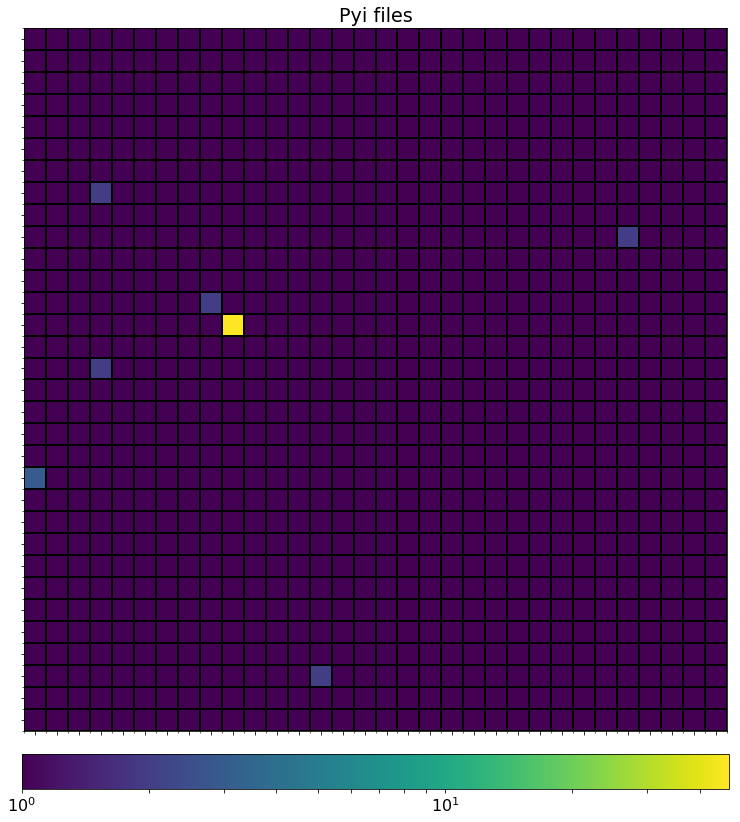

In [88]:
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext

figure(figsize=(14,14))
ax = gca()
imshow(pyi_annotations, interpolation=None, aspect='equal', norm=LogNorm())

# Major ticks
ax.set_xticks(np.arange(0, N, 1));
ax.set_yticks(np.arange(0, N, 1));

# Labels for major ticks
ax.set_xticklabels([]);
ax.set_yticklabels([]);

# Minor ticks
ax.set_xticks(np.arange(-.5, N, 1), minor=True);
ax.set_yticks(np.arange(-.5, N, 1), minor=True);

ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

colorbar(orientation='horizontal',format=LogFormatterMathtext(), fraction=0.0465, pad=0.03)
title("Pyi files")

In [109]:
repos_by_count = {}

for repo in repos:
    repos_by_count[repo['repo']['full_name']] = sum([file['annotation_hints']+file['return_hints']+file['type_comments']+file['typing_imports']+(1 if file['pyi_file'] else 0) for file in repo['files']])

In [117]:
sorted_repos = sorted(repos_by_count.items(), key = lambda x:-x[1])
print("\n".join(["{}: {}".format(x[0],x[1]) for x in sorted_repos[:20]]))

python/mypy: 9872
zulip/zulip: 5816
sphinx-doc/sphinx: 4049
jopohl/urh: 1121
home-assistant/home-assistant: 989
mitmproxy/mitmproxy: 951
awslabs/chalice: 434
yadayada/acd_cli: 414
errbotio/errbot: 413
DamnWidget/anaconda: 387
RasaHQ/rasa_nlu: 338
tomchristie/apistar: 325
python/cpython: 303
taigaio/taiga-back: 204
nabla-c0d3/sslyze: 204
kbengine/kbengine: 182
arthepsy/ssh-audit: 164
celery/celery: 161
dcos/dcos: 148
tornadoweb/tornado: 148


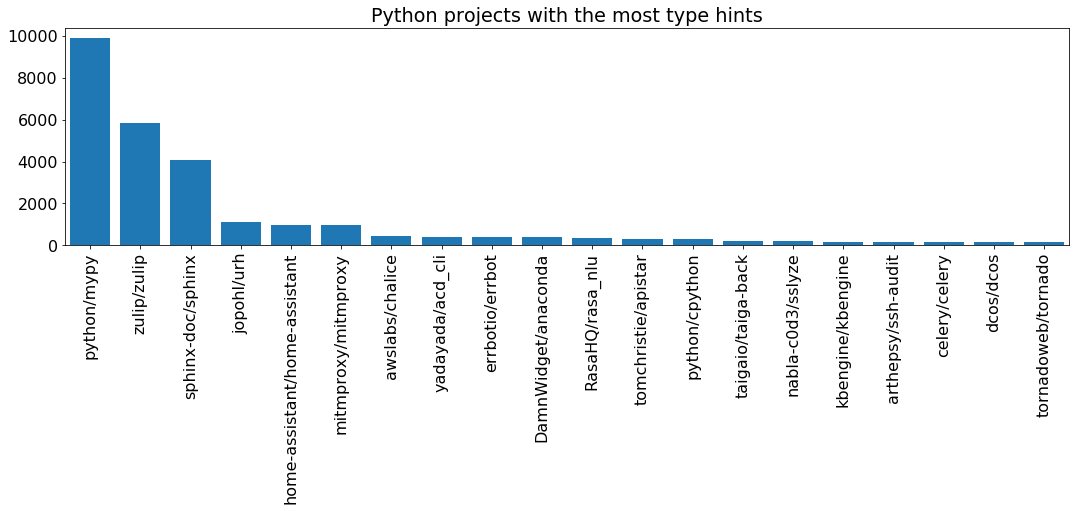

In [160]:
figure(figsize=(18,4))
N = 20
x = list(range(N))
bar(x, [repo[1] for repo in sorted_repos[:N]])
ax = gca()
ax.set_xticks(x)
ax.set_xticklabels([repo[0] for repo in sorted_repos[:N]], rotation=90);
xlim(left=-0.5, right=N-0.5);
title("Python projects with the most type hints")

In [145]:
sorted_repos[:20]

[('python/mypy', 9872),
 ('zulip/zulip', 5816),
 ('sphinx-doc/sphinx', 4049),
 ('jopohl/urh', 1121),
 ('home-assistant/home-assistant', 989),
 ('mitmproxy/mitmproxy', 951),
 ('awslabs/chalice', 434),
 ('yadayada/acd_cli', 414),
 ('errbotio/errbot', 413),
 ('DamnWidget/anaconda', 387),
 ('RasaHQ/rasa_nlu', 338),
 ('tomchristie/apistar', 325),
 ('python/cpython', 303),
 ('taigaio/taiga-back', 204),
 ('nabla-c0d3/sslyze', 204),
 ('kbengine/kbengine', 182),
 ('arthepsy/ssh-audit', 164),
 ('celery/celery', 161),
 ('dcos/dcos', 148),
 ('tornadoweb/tornado', 148)]